Preparing Data

In [ ]:
import pandas as pd
dat = pd.read_excel("data/January 2022 grain report.xlsx")
dat

In [ ]:
print(dat.columns)  # Inspect the actual column names

# Update the column references based on the actual names
selected_data = dat[['Unnamed: 8']]

selected_data

In [ ]:
# Convert the column to numeric, coercing errors to NaN
selected_data['Unnamed: 8'] = pd.to_numeric(selected_data['Unnamed: 8'], errors='coerce')

# Select only rows up to the 31st row (excluding row 32 and beyond)
selected_data_cleaned = selected_data.iloc[:31].dropna()

# Plot the cleaned data
selected_data_cleaned.plot()

selected_data_cleaned.to_excel("Jan_corn.xlsx", index=False)


In [ ]:
import pandas as pd
dat = pd.read_excel("data/raw/December 2022.xlsx",sheet_name=0)
dat

print(dat.columns)  # Inspect the actual column names

In [ ]:
import pandas as pd
dat = pd.read_excel("data/raw/December 2022.xlsx", sheet_name=0)
dat


# # Update the column references based on the actual names
selected = dat[['Unnamed: 7']]

selected


# # # Convert the column to numeric, coercing errors to NaN
selected['Unnamed: 7'] = pd.to_numeric(selected['Unnamed: 7'], errors='coerce')

# # # Select only rows up to the 31st row (excluding row 32 and beyond)
selected_data_cleaned = selected.iloc[:31].dropna()

# # # Plot the cleaned data
selected_data_cleaned.plot()

selected_data_cleaned.to_excel("data/processed/12_corn.xlsx", index=False)


In [ ]:
selected_data_cleaned

In [ ]:
import pandas as pd

# File paths
file_paths = [
    'data/processed/1_corn.xlsx', 'data/processed/2_corn.xlsx', 'data/processed/3_corn.xlsx',
    'data/processed/4_corn.xlsx', 'data/processed/5_corn.xlsx', 'data/processed/6_corn.xlsx',
    'data/processed/7_corn.xlsx', 'data/processed/8_corn.xlsx', 'data/processed/9_corn.xlsx',
    'data/processed/10_corn.xlsx', 'data/processed/11_corn.xlsx', 'data/processed/12_corn.xlsx'
]

# months = ['Unnamed: 8', 'Unnamed: 8', 'Unnamed: 8', '4','5','6','7','8','9','10','11','12']  # Corresponding month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']



# Reading and combining all the files into a single DataFrame
all_data = pd.DataFrame()
for file, month in zip(file_paths, months):
    df = pd.read_excel(file)
    df['Month'] = month  # Add a column for the month
    all_data = pd.concat([all_data, df], ignore_index=True)

# Keeping only relevant columns and renaming
cleaned_data = all_data[['Unnamed: 8', 'Month']].rename(columns={'Unnamed: 8': 'Price'})


# Set the option to display more rows
pd.set_option('display.max_rows', None)

# Assuming 'cleaned_data' is your DataFrame
print(cleaned_data)

In [6]:
import pandas as pd

file_paths = [
    'data/processed/1_corn.xlsx', 'data/processed/2_corn.xlsx', 'data/processed/3_corn.xlsx',
    'data/processed/4_corn.xlsx', 'data/processed/5_corn.xlsx', 'data/processed/6_corn.xlsx',
    'data/processed/7_corn.xlsx', 'data/processed/8_corn.xlsx', 'data/processed/9_corn.xlsx',
    'data/processed/10_corn.xlsx', 'data/processed/11_corn.xlsx', 'data/processed/12_corn.xlsx'
]

cleaned_data = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    
    # 열 이름 확인 및 올바른 열 선택
    if 'Unnamed: 7' in df.columns:
        price_column = 'Unnamed: 7'
    elif 'Unnamed: 8' in df.columns:
        price_column = 'Unnamed: 8'
    elif 'Unnamed: 9' in df.columns:
        price_column = 'Unnamed: 9'
    elif 'State\nAverage' in df.columns:
        price_column = 'State\nAverage'
    else:
        continue  # 해당 열이 없는 경우, 다음 파일로 넘어감

    df['Price'] = df[price_column]
    df['Month'] = file_path.split('/')[2].split('_')[0]
    df = df[['Price', 'Month']]
    cleaned_data = pd.concat([cleaned_data, df], ignore_index=True)

cleaned_data.dropna(subset=['Price'], inplace=True)
pd.set_option('display.max_rows', None)
print(cleaned_data)

      Price Month
0    5.7200     1
1    5.8800     1
2    5.8200     1
3    5.8400     1
4    5.8700     1
5    5.8000     1
6    5.8100     1
7    5.7900     1
8    5.6700     1
9    5.7600     1
10   5.9000     1
11   5.9000     1
12   5.9000     1
13   5.9900     1
14   6.0100     1
15   6.0100     1
16   6.0800     1
17   6.0600     1
18   6.1600     1
19   6.1733     2
20   6.0493     2
21   5.9904     2
22   6.0275     2
23   6.1704     2
24   6.1405     2
25   6.2826     2
26   6.2231     2
27   6.3036     2
28   6.3606     2
29   6.1854     2
30   6.2731     2
31   6.3022     2
32   6.3431     2
33   6.5471     2
34   6.6297     2
35   6.6670     2
36   6.3115     2
37   6.9712     3
38   6.9388     3
39   7.1255     3
40   7.1776     3
41   7.0714     3
42   7.0557     3
43   6.8693     3
44   7.0542     3
45   7.0985     3
46   6.9910     3
47   7.0702     3
48   6.7929     3
49   7.0391     3
50   6.9321     3
51   7.1101     3
52   7.1105     3
53   7.1515     3
54   7.094

In [ ]:
cleaned_data.plot()

In [ ]:
cleaned_data.to_excel("combined_corn.xlsx", index=False)


Training Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 데이터 로드
data = pd.read_excel('combined_corn.xlsx')

# 'Month' 열을 원-핫 인코딩
ohe = OneHotEncoder(sparse=False)
month_encoded = ohe.fit_transform(data[['Month']])

# 원-핫 인코딩된 데이터를 DataFrame으로 변환
month_encoded_df = pd.DataFrame(month_encoded, columns=ohe.get_feature_names_out(['Month']))

# 원본 데이터프레임과 병합
data_encoded = pd.concat([data, month_encoded_df], axis=1)

# 독립 변수와 종속 변수 정의
X = data_encoded.drop(['Price', 'Month'], axis=1)
y = data_encoded['Price']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.033290654898286205
R-squared: 0.8987758981863341


c:\Users\MSI\AppData\Local\Programs\Python\Python311\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (12,) and (72,)

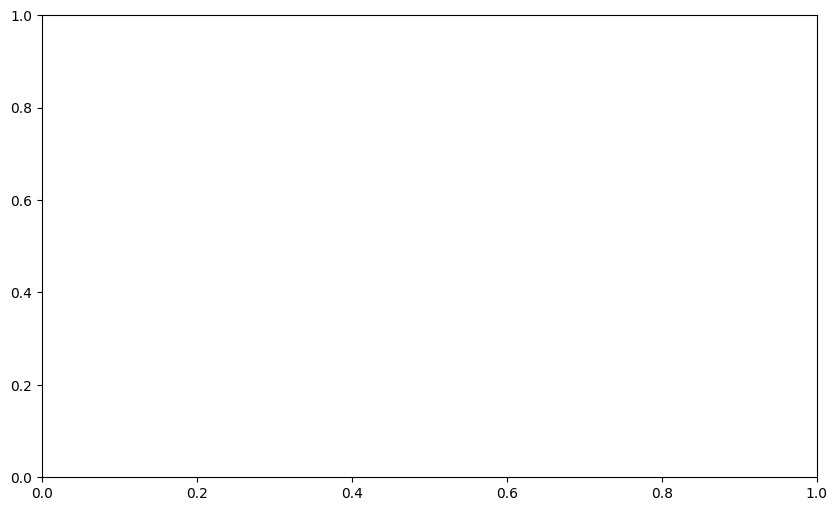

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2023년 1월, 2월, 3월의 실제 데이터 로드 (예시)
# 실제 파일 경로와 열 이름은 데이터에 맞게 조정해야 함
actual_data_2023 = pd.read_csv('1to3_actual_corn.csv')

# 원-핫 인코딩 적용
actual_data_2023_encoded = ohe.transform(actual_data_2023[['Month']])
actual_data_2023_encoded_df = pd.DataFrame(actual_data_2023_encoded, columns=ohe.get_feature_names_out(['Month']))

# 4월부터 12월까지의 데이터 생성 및 원-핫 인코딩 적용
future_months = pd.DataFrame({'Month': range(4, 13)})
future_months_encoded = ohe.transform(future_months[['Month']])
future_months_encoded_df = pd.DataFrame(future_months_encoded, columns=ohe.get_feature_names_out(['Month']))

# 4월부터 12월까지 예측
predicted_prices_future = model.predict(future_months_encoded_df)

# 실제 데이터와 예측 데이터 합치기
all_prices_2023 = np.concatenate((actual_data_2023['Price'].values, predicted_prices_future))

# 전체 2023년 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), all_prices_2023, marker='o')
plt.title('Actual and Predicted Corn Prices for 2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()
